# Ejercicio 1 - Modelo pronóstico demanda

Julián David Pérez Navarro

## Conceptos

### Series de tiempo

Una serie de tiempo es una secuencia de datos recogidos en intervalos de tiempo sucesivos, generalmente espaciados uniformemente.

### Pronóstico

El pronóstico de series de tiempo implica pronosticar y extrapolar tendencias o valores futuros basándose en puntos de datos antiguos (pronóstico de series de tiempo supervisado), o agruparlos en grupos y predecir patrones futuros (pronóstico de series de tiempo no supervisado)

### Características

time series forecasting involves forecasting and extrapolating future trends or values based on old data points (supervised time-series forecasting), clustering them into groups, and predicting future patterns (unsupervised time-series forecasting)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

from dotenv import load_dotenv

In [2]:
_ = load_dotenv()

## Importar datos

In [3]:
path = os.getenv("TIME_SERIES_PATH")

df = pd.read_csv(path)

df.head()

,year_month,Demand
0,2017-01,1211.009490
1,2017-02,1660.584649
2,2017-03,3182.587014
3,2017-04,3506.515270
4,2017-05,4554.082280


In [4]:
df.columns = ["Date", "Demand"]

df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

In [5]:
print(df.isnull().sum())
print(df.describe())

Demand    0
dtype: int64
            Demand
count    64.000000
mean   2600.044986
std    1943.995938
min     217.314949
25%    1034.370651
50%    1947.817229
75%    4216.465081
max    7686.307292


## Normalize data

In [6]:
standard_scaler = StandardScaler()

df["Demand"] = standard_scaler.fit_transform(df[["Demand"]])

## Visualización de los datos

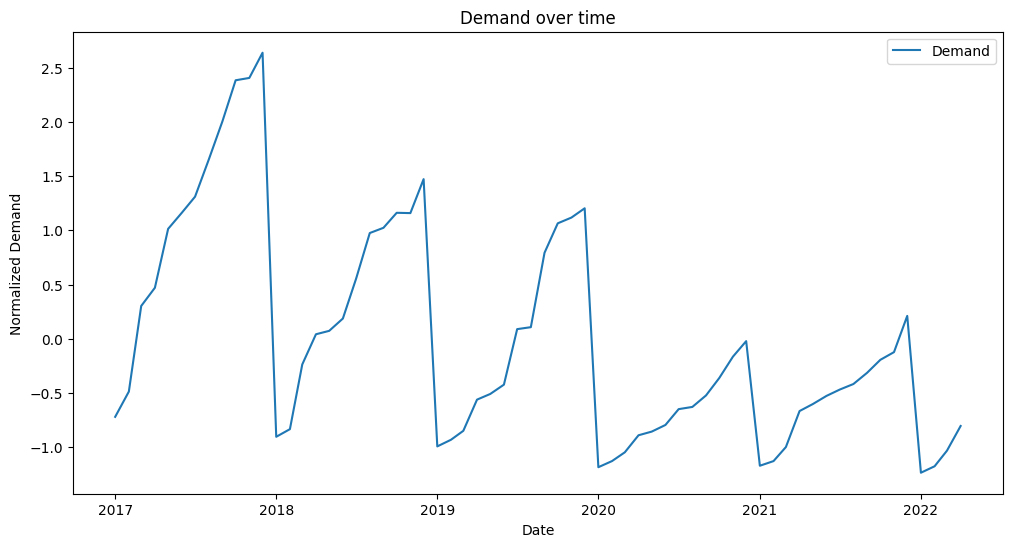

In [7]:
plt.figure(figsize=(12,6), dpi=100)
plt.plot(df["Demand"], label="Demand")
plt.title("Demand over time")
plt.xlabel("Date")
plt.ylabel("Normalized Demand")
plt.legend()
plt.show()

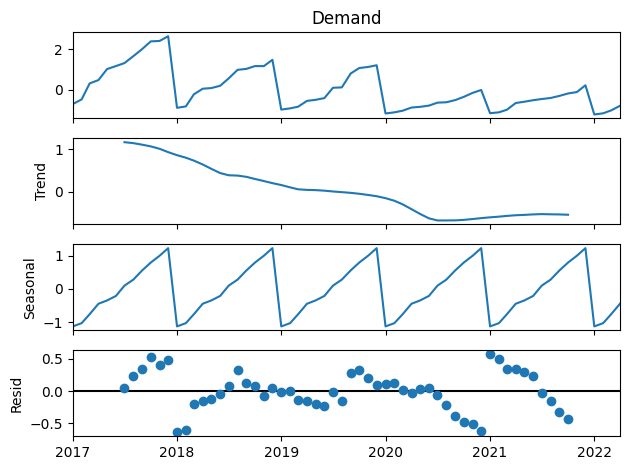

In [8]:
decomposition_additive = seasonal_decompose(df["Demand"], model="additive")

decomposition_additive.plot()
plt.show()

## Split into training and testing data

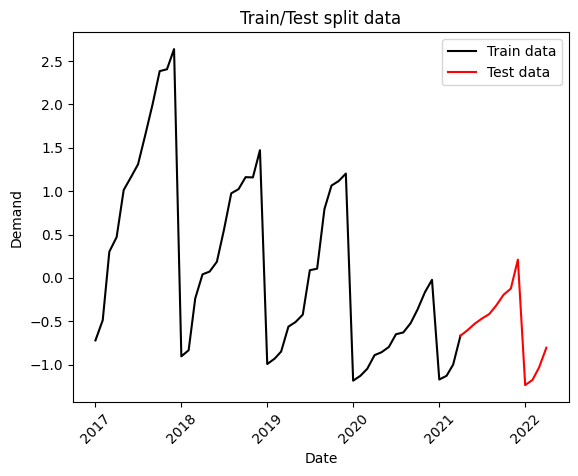

In [9]:
train_size = int(len(df) * 0.8)

train_data, test_data = df.iloc[:train_size+1], df.iloc[train_size:]

plt.plot(train_data, color = "black", label="Train data")
plt.plot(test_data, color = "red", label="Test data")
plt.ylabel('Demand')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.title("Train/Test split data")
plt.show()

## Holt-Winters Model

In [10]:
hw_model = ExponentialSmoothing(train_data["Demand"], trend="add", seasonal="add", seasonal_periods=12)
hw_fit = hw_model.fit()
hw_pred = hw_fit.forecast(len(test_data))

hw_mse = mean_squared_error(test_data["Demand"], hw_pred)
hw_mae = mean_absolute_error(test_data["Demand"], hw_pred)

print(f"Holt-Winters Metrics: \nMSE = {hw_mse} \nMAE = {hw_mae}")

Holt-Winters Metrics: 
MSE = 0.5325022250673163 
MAE = 0.5624636237495871


c:\dev\prueba_profesional_ml\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


## ARIMA Model

In [25]:
arima_model = ARIMA(train_data["Demand"], order=(1, 1, 0))
arima_fit = arima_model.fit()
arima_pred = arima_fit.forecast(steps=len(test_data))

arima_mse = mean_squared_error(test_data['Demand'], arima_pred)
arima_mae = mean_absolute_error(test_data['Demand'], arima_pred)
print(f'ARIMA MSE: \nMSE = {arima_mse} \nMAE = {arima_mae}')

ARIMA MSE: 
MSE = 0.1765874029041951 
MAE = 0.34773808524931743


c:\dev\prueba_profesional_ml\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\dev\prueba_profesional_ml\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\dev\prueba_profesional_ml\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


## SARIMAX Model

In [12]:
sarimax_model = SARIMAX(train_data["Demand"], order=(0, 0, 1), seasonal_order=(1, 0, 0, 12))
sarimax_fit = sarimax_model.fit()
sarimax_pred = sarimax_fit.predict(start=len(train_data), end=(len(train_data) + len(test_data) - 1), typ="levels")

sarimax_mse = mean_squared_error(test_data['Demand'], sarimax_pred)
sarimax_mae = mean_absolute_error(test_data['Demand'], sarimax_pred)
print(f'SARIMAX MSE: \nMSE = {sarimax_mse} \nMAE = {sarimax_mae}')

SARIMAX MSE: 
MSE = 0.14777588269763922 
MAE = 0.22131729934370734


c:\dev\prueba_profesional_ml\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\dev\prueba_profesional_ml\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\dev\prueba_profesional_ml\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


## Result comparison

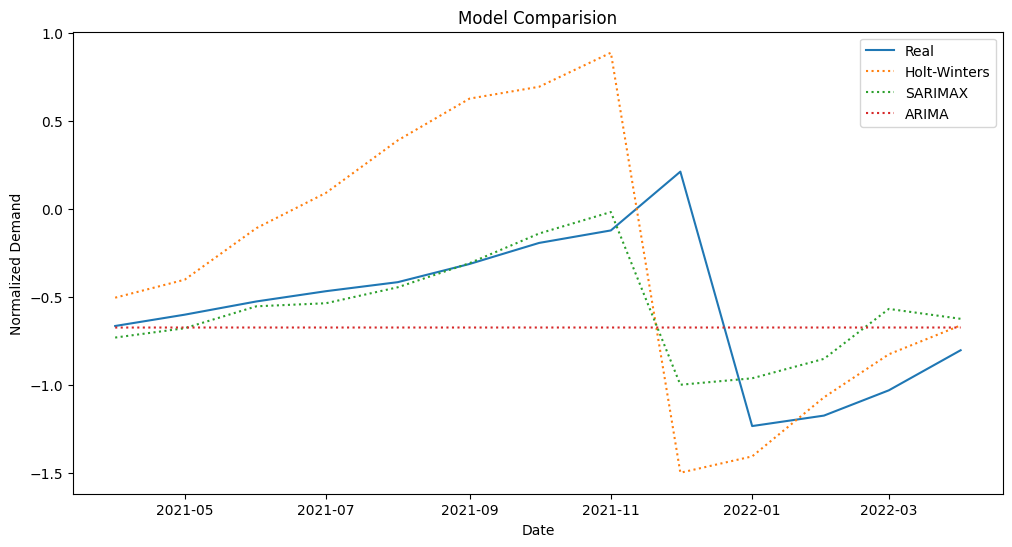

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Demand'], label='Real')
plt.plot(test_data.index, hw_pred, label='Holt-Winters', linestyle="dotted")
plt.plot(test_data.index, sarimax_pred, label='SARIMAX', linestyle="dotted")
plt.plot(test_data.index, arima_pred, label='ARIMA', linestyle="dotted")
plt.title('Model Comparision')
plt.xlabel('Date')
plt.ylabel('Normalized Demand')
plt.legend()
plt.show()

## Table of model metrics

In [27]:
metrics = pd.DataFrame({
    'Model': ['Holt-Winters', 'ARIMA', 'SARIMAX'],
    'MSE': [hw_mse, arima_mse, sarimax_mse],
    'MAE': [hw_mae, arima_mse, sarimax_mae]
})
print(metrics)

          Model       MSE       MAE
0  Holt-Winters  0.532502  0.562464
1         ARIMA  0.176587  0.176587
2       SARIMAX  0.147776  0.221317


## Forecast next 3 months

In [60]:
hw_pred_future = hw_fit.forecast(len(test_data) + 2)
hw_pred_future = hw_pred_future[-3:]

print(f'Predicción Holt-Winters para los próximos 3 meses:\n{hw_pred_future}')

Predicción Holt-Winters para los próximos 3 meses:
2022-05-01   -0.663182
2022-06-01   -0.560982
2022-07-01   -0.267616
Freq: MS, dtype: float64


In [61]:
arima_pred_future = arima_fit.forecast(len(test_data) + 2)
arima_pred_future = arima_pred_future[-3:]

print(f'Predicción ARIMA para los próximos 3 meses:\n{arima_pred_future}')

Predicción ARIMA para los próximos 3 meses:
2022-05-01   -0.67526
2022-06-01   -0.67526
2022-07-01   -0.67526
Freq: MS, Name: predicted_mean, dtype: float64


In [62]:
sarimax_pred_future = sarimax_fit.predict(start=len(df), end=len(df) + 2, typ='levels')

print(f'Predicción SARIMAX para los próximos 3 meses:\n{sarimax_pred_future}')

Predicción SARIMAX para los próximos 3 meses:
2022-05-01   -0.625771
2022-06-01   -0.580486
2022-07-01   -0.473873
Freq: MS, Name: predicted_mean, dtype: float64


c:\dev\prueba_profesional_ml\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [63]:
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=3, freq="MS")

predictions_df = pd.DataFrame(
    {
        'Holt-Winters': hw_pred_future,
        'ARIMA': arima_pred_future,
        'SARIMAX': sarimax_pred_future
    },
    index=future_dates
)

df_predictions = df.copy()
df_predictions = pd.concat([df, predictions_df])


In [64]:
df_predictions.tail()

,Demand,Holt-Winters,ARIMA,SARIMAX
2022-03-01,-1.032237,NaN,NaN,NaN
2022-04-01,-0.804438,NaN,NaN,NaN
2022-05-01,NaN,-0.663182,-0.67526,-0.625771
2022-06-01,NaN,-0.560982,-0.67526,-0.580486
2022-07-01,NaN,-0.267616,-0.67526,-0.473873


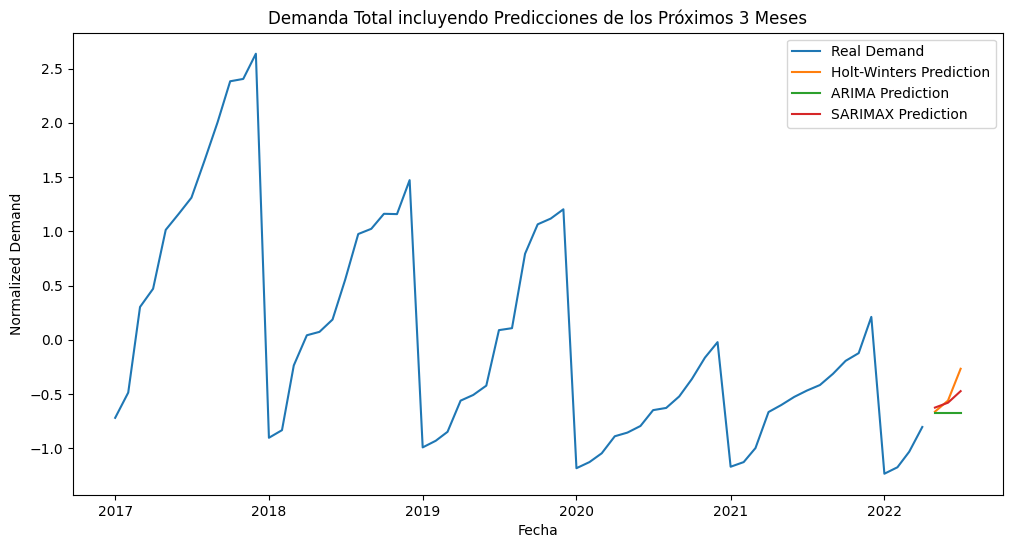

In [65]:
plt.figure(figsize=(12, 6))
plt.plot(df['Demand'], label='Real Demand')
plt.plot(df_predictions.index, df_predictions['Holt-Winters'], label='Holt-Winters Prediction')
plt.plot(df_predictions.index, df_predictions['ARIMA'], label='ARIMA Prediction')
plt.plot(df_predictions.index, df_predictions['SARIMAX'], label='SARIMAX Prediction')
plt.title('Demanda Total incluyendo Predicciones de los Próximos 3 Meses')
plt.xlabel('Fecha')
plt.ylabel('Normalized Demand')
plt.legend()
plt.show()